In [1]:
import pandas as pd

file_name = 'data/1-s2.0-S1097276521002665-mmc6.xlsx'
different_genes_xls = pd.ExcelFile(file_name)

In [2]:
xls_sheets = [sheets for sheets in different_genes_xls.sheet_names if sheets[:2] == '5B']

In [3]:
import joblib 
out_file_path = './'
gene_signature_dir = out_file_path + 'gene_signatures/'
out_filename = gene_signature_dir + 'metabolism_terms_mouse.pickle'
metabolism_sig = joblib.load(out_filename)

# Jaccard Index

In [4]:
for sheet_name in xls_sheets:
    df = pd.read_excel(file_name, sheet_name=sheet_name)
    diff_gene_set = set([item.upper() for item in df[df['log2FC']>1]['index'].tolist()])
    for pathway_key in metabolism_sig:
        pct_overlap = len(diff_gene_set.intersection(metabolism_sig[pathway_key]))/(len(diff_gene_set)+len(metabolism_sig[pathway_key]))
        if pct_overlap > 0:
            print(sheet_name, pathway_key, pct_overlap)

5BA_diffexpr-nonnaive-cluster1 KEGG_MM_GLYCOSAMINOGLYCAN_BIOSYNTHESIS_KERATAN_SULFATE 0.030303030303030304
5BA_diffexpr-nonnaive-cluster1 KEGG_MM_PI3K-AKT_SIGNALING_PATHWAY 0.002680965147453083
5BA_diffexpr-nonnaive-cluster1 KEGG_MM_NOD-LIKE_RECEPTOR_SIGNALING_PATHWAY 0.012987012987012988
5BB_diffexpr-nonnaive-cluster2 KEGG_MM_GLYCOSAMINOGLYCAN_BIOSYNTHESIS_HEPARAN_SULFATE_HEPARIN 0.015384615384615385
5BB_diffexpr-nonnaive-cluster2 KEGG_MM_PI3K-AKT_SIGNALING_PATHWAY 0.005050505050505051
5BD_diffexpr-nonnaive-cluster4 KEGG_MM_GLYCOLYSIS_GLUCONEOGENESIS 0.012875536480686695
5BD_diffexpr-nonnaive-cluster4 KEGG_MM_FRUCTOSE_AND_MANNOSE_METABOLISM 0.00966183574879227
5BD_diffexpr-nonnaive-cluster4 KEGG_MM_PURINE_METABOLISM 0.008902077151335312
5BD_diffexpr-nonnaive-cluster4 KEGG_MM_PYRIMIDINE_METABOLISM 0.018726591760299626
5BD_diffexpr-nonnaive-cluster4 KEGG_MM_GLYCINE_SERINE_AND_THREONINE_METABOLISM 0.0048543689320388345
5BD_diffexpr-nonnaive-cluster4 KEGG_MM_CYSTEINE_AND_METHIONINE_METABO

In [5]:
from utils import *

M = 9822
res = {'cluster_name': [], 'pathway_name': [], 'p-value': []}
for sheet_name in xls_sheets:
    df = pd.read_excel(file_name, sheet_name=sheet_name)
    diff_gene_set = set([item.upper() for item in df[df['log2FC']>1]['index'].tolist()])
    for pathway_key in metabolism_sig:
        n = len(metabolism_sig[pathway_key])
        N = len(diff_gene_set)
        x = len(diff_gene_set.intersection(metabolism_sig[pathway_key]))
        pct_overlap = x/(N+n)
        
        if pct_overlap > 0:
            p_val = hypergeometric_test(total_genes_expressed=M, n_genes_of_interest=n, 
                                        n_genes_picked=N, n_overlap=x)
            res['cluster_name'].append(sheet_name)
            res['pathway_name'].append(pathway_key)
            res['p-value'].append(p_val)
#         else:
#             res['cluster_name'].append(sheet_name)
#             res['pathway_name'].append(pathway_key)
#             res['p-value'].append(1)

In [6]:
df = pd.DataFrame.from_dict(res)

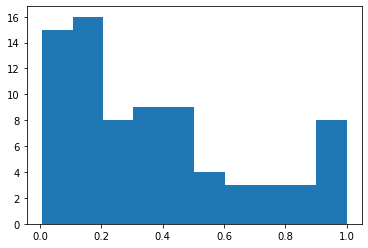

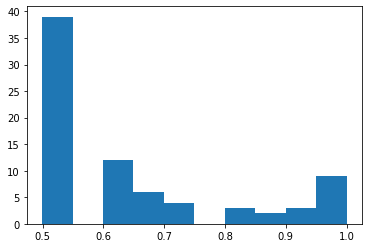

In [29]:
import matplotlib.pyplot as plt
p_adj = adjust_p_value_bh(df['p-value'].values)
plt.hist(df['p-value'].values, bins=10)
# plt.xlim([0, 0.9])
# plt.ylim([0, 100])
plt.show()
plt.hist(p_adj, bins=10)
plt.show()

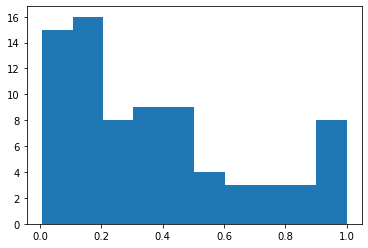

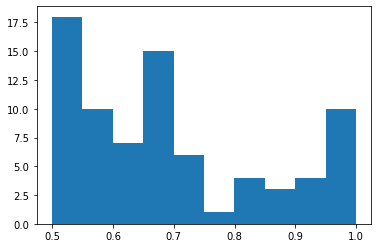

In [24]:
p_adj = adjust_p_value_fdr(df['p-value'].values)
plt.hist(df['p-value'], bins=10)
# plt.xlim([0, 0.9])
# plt.ylim([0, 100])
plt.show()
plt.hist(p_adj, bins=10)
plt.show()

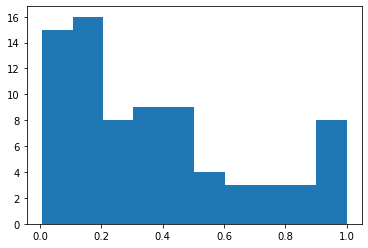

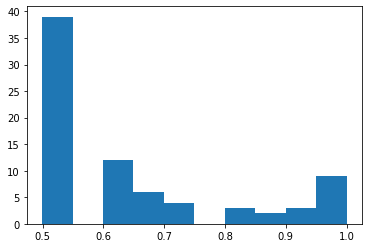

In [19]:
p_adj = adjust_p_value_qval(df['p-value'].values)
import matplotlib.pyplot as plt
plt.hist(df['p-value'], bins=10)
# plt.xlim([0, 0.9])
# plt.ylim([0, 100])
plt.show()
plt.hist(p_adj, bins=10)
plt.show()

In [20]:
p_adj

array([0.49917775, 0.68026245, 0.49917775, 0.49917775, 0.65908895,
       0.49917775, 0.49917775, 0.7342346 , 0.49917775, 0.68026245,
       0.68026245, 0.49917775, 0.73650001, 0.81751904, 0.70254676,
       0.64399153, 0.49917775, 0.50500555, 0.9277275 , 0.9999937 ,
       0.87326866, 0.73650001, 0.95726064, 0.54439223, 0.64399153,
       0.54439223, 0.49917775, 0.9999937 , 0.50500555, 0.84848352,
       0.49917775, 0.60553911, 0.9999937 , 0.64399153, 0.84848352,
       0.53221401, 0.60553911, 0.63641337, 0.49917775, 0.54439223,
       0.50500555, 0.68026245, 0.9999937 , 0.63641337, 0.9999937 ,
       0.49917775, 0.64399153, 0.50500555, 0.49917775, 0.9999937 ,
       0.49917775, 0.49917775, 0.54439223, 0.64399153, 0.50500555,
       0.49917775, 0.49917775, 0.93210966, 0.49917775, 0.53221401,
       0.92591787, 0.49917775, 0.49917775, 0.49917775, 0.9999937 ,
       0.51382166, 0.86636188, 0.68920044, 0.50500555, 0.49917775,
       0.50500555, 0.64399153, 0.49917775, 0.49917775, 0.49917

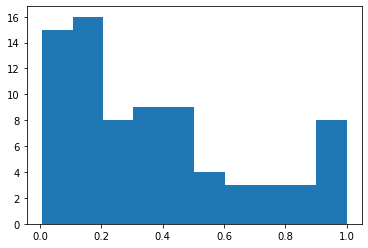

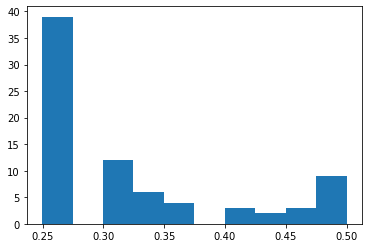

In [21]:
p_adj = adjust_p_value_qval(df['p-value'].values, pi_0=0.5)
import matplotlib.pyplot as plt
plt.hist(df['p-value'], bins=10)
# plt.xlim([0, 0.9])
# plt.ylim([0, 100])
plt.show()
plt.hist(p_adj, bins=10)
plt.show()

In [9]:
df['p-adj'] = p_adj

In [10]:
df[df['p-adj']<0.05]

,cluster_name,pathway_name,p-value,p-adj


In [86]:
adjust_p_value_fdr(df['p-value'])

0     0.029019
1     1.000000
2     0.891466
3     0.152219
4     0.745057
        ...   
73    0.187921
74    0.149926
75    1.000000
76    0.949185
77    0.505286
Name: p-value, Length: 78, dtype: float64

In [14]:
df.to_csv('test_q_val.csv')

https://www.bioconductor.org/packages/release/bioc/vignettes/qvalue/inst/doc/qvalue.pdf
>The “U-shaped” p-value histogram is a red flag. An important assumption behind the estimation performed
in this package is that null p-values follow a Uniform(0,1) distribution, which would result in a p-value
histogram where the right tail is fairly flat as in the Hedenfalk et al. p-values. U-shaped p-value histograms
can indicate that a one-sided test was performed on data where there is signal in both directions, or it can
indicate that there is dependence among the variables in the data. In the latter case, we suggest considering
the sva Bioconductor package. In either case, it is usually possible to compute the p-values using a different
model or method that will yield p-values that better match the underlying assumptions of the methods
implemented in this package.